In [39]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [9]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Urban2\Urban\dataset\hourly_city_load.csv')

df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Date'] = df['Datetime'].dt.date
df.set_index('Datetime', inplace=True)

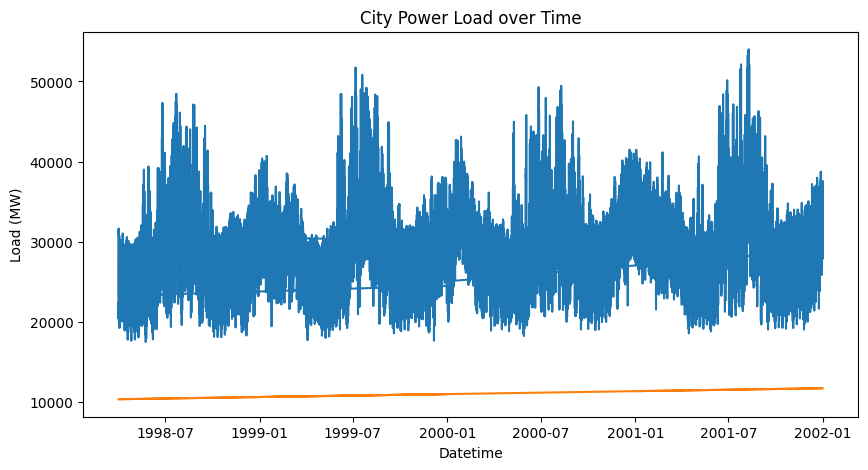

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df)
plt.title('City Power Load over Time')
plt.xlabel('Datetime')
plt.ylabel('Load (MW)')
plt.show()

In [15]:
df.rename(columns={'Date': 'ds', 'PJM_Load_MW': 'y'}, inplace=True)

print(df.head())


                           y          ds
Datetime                                
1998-12-31 01:00:00  29309.0  1998-12-31
1998-12-31 02:00:00  28236.0  1998-12-31
1998-12-31 03:00:00  27692.0  1998-12-31
1998-12-31 04:00:00  27596.0  1998-12-31
1998-12-31 05:00:00  27888.0  1998-12-31


In [19]:
model = Prophet()
model.fit(df)

15:18:36 - cmdstanpy - INFO - Chain [1] start processing
15:18:49 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1732,2002-12-28
1733,2002-12-29
1734,2002-12-30
1735,2002-12-31
1736,2003-01-01


In [22]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
1732,2002-12-28,26867.602339,17441.393334,37607.327405
1733,2002-12-29,25928.360101,16341.987180,36584.320082
1734,2002-12-30,29714.378463,20128.587361,39976.805953
1735,2002-12-31,30297.223205,20628.145428,40603.883166
1736,2003-01-01,30253.424460,20952.304047,40239.209735


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


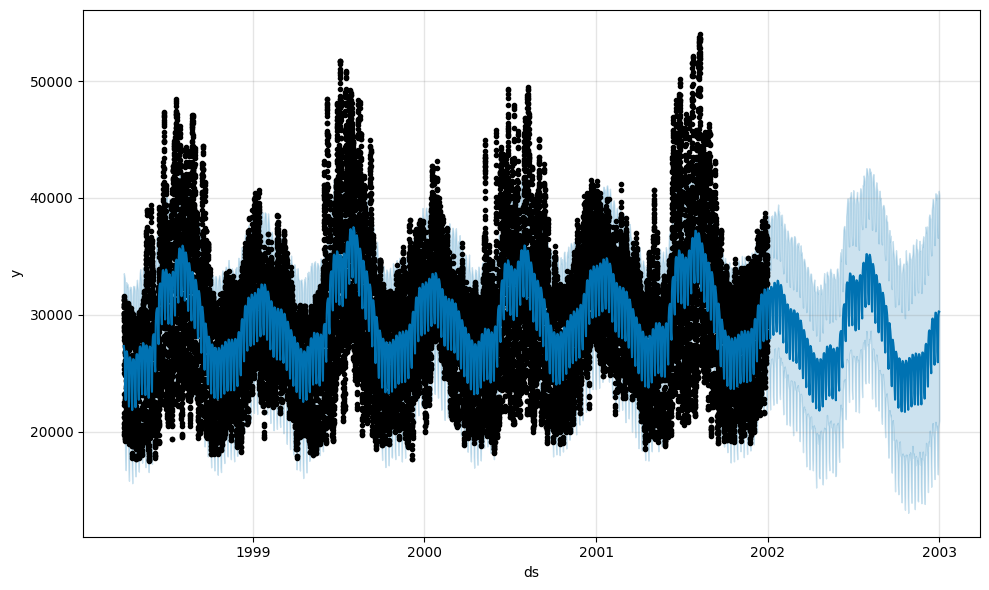

In [23]:
fig1 = model.plot(forecast)



c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing py

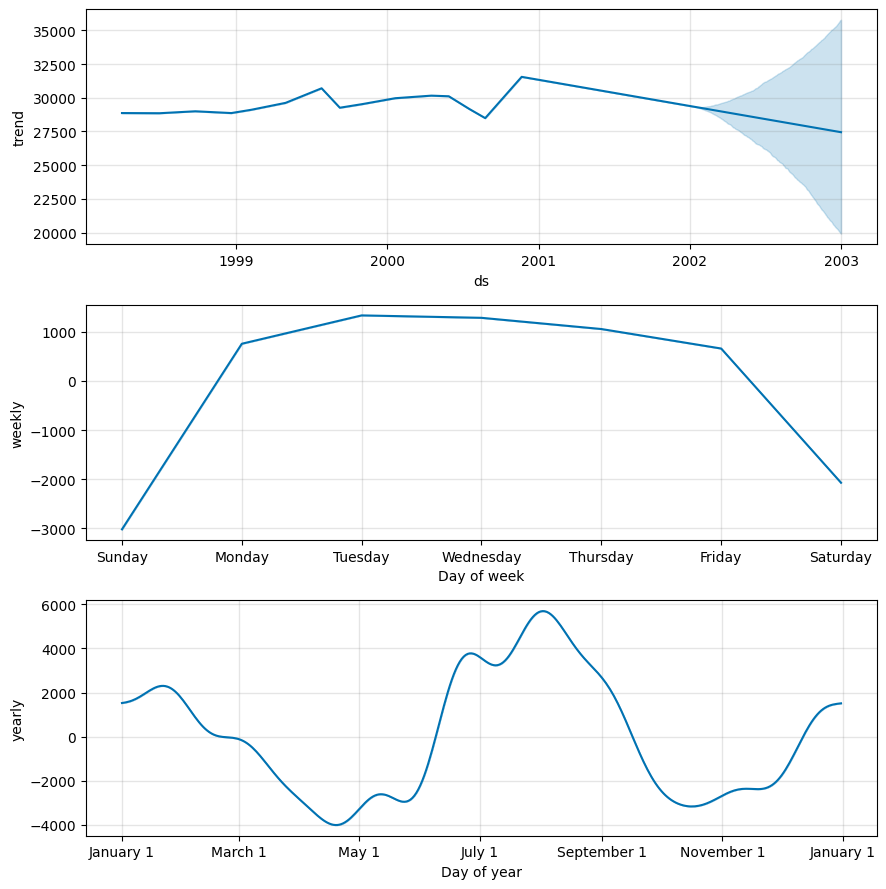

In [25]:
fig2 = model.plot_components(forecast)



In [28]:
plot_plotly(model, forecast)

In [31]:
plot_components_plotly(model, forecast)


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [37]:
# predictin for next 20 years  ~~~~aproxx prediction
future = model.make_future_dataframe(periods=20*365)
forecast = model.predict(future)


print(forecast.tail())


             ds        trend     yhat_lower     yhat_upper    trend_lower  \
8667 2021-12-23 -9447.128839 -764478.875094  763977.237818 -766485.469474   
8668 2021-12-24 -9452.451972 -764518.178522  765637.249170 -766549.976009   
8669 2021-12-25 -9457.775105 -773566.342958  765092.620048 -766614.482545   
8670 2021-12-26 -9463.098238 -769532.256426  764509.063100 -766678.989080   
8671 2021-12-27 -9468.421371 -766992.752751  771850.586778 -766743.495616   

        trend_upper  additive_terms  additive_terms_lower  \
8667  766292.208062     2373.179810           2373.179810   
8668  766482.182316     2024.494314           2024.494314   
8669  766672.156569     -669.506915           -669.506915   
8670  766862.130823    -1587.794391          -1587.794391   
8671  767052.105076     2215.052304           2215.052304   

      additive_terms_upper       weekly  weekly_lower  weekly_upper  \
8667           2373.179810  1057.218355   1057.218355   1057.218355   
8668           2024.494314  

In [41]:

#save the model
with open('power_pred_prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)